In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/nyc-property-sales/nyc-rolling-sales.csv')

In [3]:
print(data.shape)

(84548, 22)


# Exploratary Data Analysis

In [4]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
data['EASE-MENT'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 84548 entries, 0 to 84547
Series name: EASE-MENT
Non-Null Count  Dtype 
--------------  ----- 
84548 non-null  object
dtypes: object(1)
memory usage: 660.7+ KB


In [6]:
data.drop(columns=['Unnamed: 0', 'EASE-MENT'], inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

## Converting Datatypes

In [8]:
num_cats = ['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE',
            'TAX CLASS AT TIME OF SALE']

for colname in num_cats:
    data[colname] = data[colname].astype('category')  

In [9]:
numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE']

for col in numer: # coerce for missing values
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [10]:
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'])

In [11]:
# Replacing numeric values with BOROUGH names
data['BOROUGH'] = data['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})

In [12]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [13]:
#create a new column for age of the unit
data['AGE'] = 2024 - data['YEAR BUILT']

In [14]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,124
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,...,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,124
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,...,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,124
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,111
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,124


In [15]:
# Percentage of missing values
data.isnull().sum()/len(data)*100

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.000000
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.000000
ADDRESS                            0.000000
APARTMENT NUMBER                   0.000000
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  31.049818
GROSS SQUARE FEET                 32.658372
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        17.222170
SALE DATE                          0.000000
AGE                                0.000000
dtype: float64

Since SALE PRICE is the target variable, rows with missing values cannot be used in the model and will be dropped. For LAND SQUARE FEET and GROSS SQUARE FEET, I'll impute the missing values with the median, as it's more robust to skewed distributions, helping preserve data integrity without losing too many rows.

In [16]:
data = data.dropna(subset=['SALE PRICE'])

data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].fillna(data['LAND SQUARE FEET'].median())
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].fillna(data['GROSS SQUARE FEET'].median())

In [17]:
data.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
AGE                               0
dtype: int64

/tmp/ipykernel_17/1966463516.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_borough = data.groupby('BOROUGH')['SALE PRICE'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


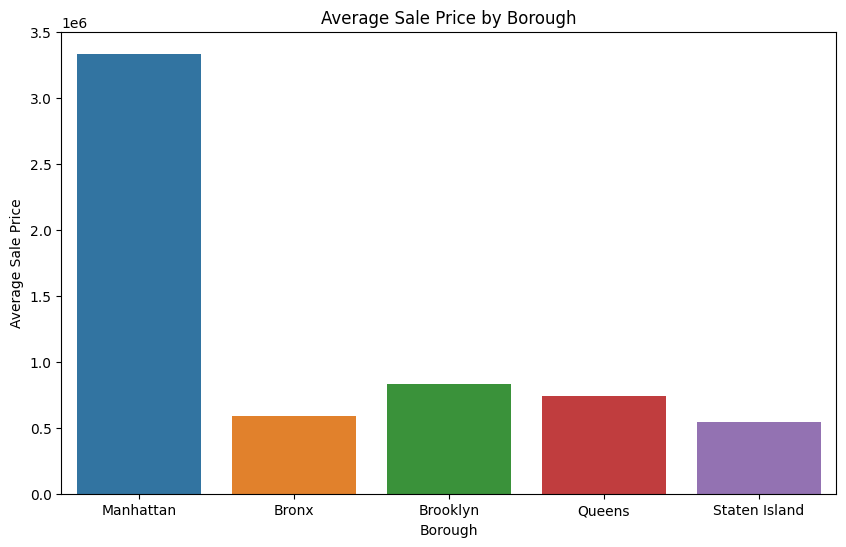

In [18]:
#Average Sale Price by Borough
plt.figure(figsize=(10, 6))
avg_price_by_borough = data.groupby('BOROUGH')['SALE PRICE'].mean().reset_index()
sns.barplot(x='BOROUGH', y='SALE PRICE', data=avg_price_by_borough)
plt.title('Average Sale Price by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Sale Price')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


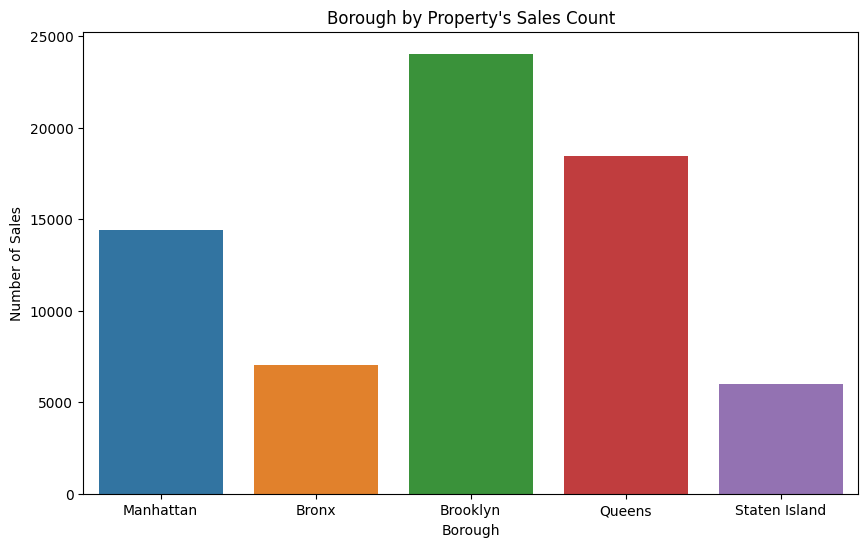

In [19]:
plt.figure(figsize=(10, 6))
borough_sales_count = data['BOROUGH'].value_counts().reset_index()
borough_sales_count.columns = ['BOROUGH', 'SALES COUNT']

sns.barplot(x='BOROUGH', y='SALES COUNT', data=borough_sales_count)
plt.title("Borough by Property's Sales Count")
plt.xlabel('Borough')
plt.ylabel('Number of Sales')
plt.show()

Manhattan is the most expensive, but Brooklyn is the most active market.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


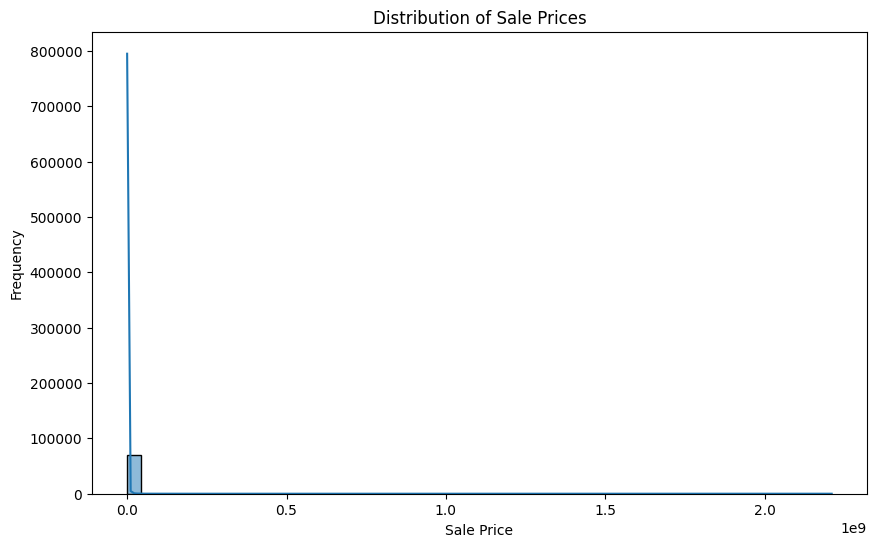

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data['SALE PRICE'], bins=50, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In this step, I filtered the dataset to focus on properties with sale prices below 5,000,000 and greater than 1,000. This helps exclude extreme outliers that could skew the distribution and remove nonsensical sale values like $0, which typically represent non-monetary transactions (e.g., deed transfers).

In [21]:
#Filter sale_price to below $5,000,000 and remove sale_price = 0
data = data[(data['SALE PRICE'] < 5000000) & (data['SALE PRICE'] > 1000)]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


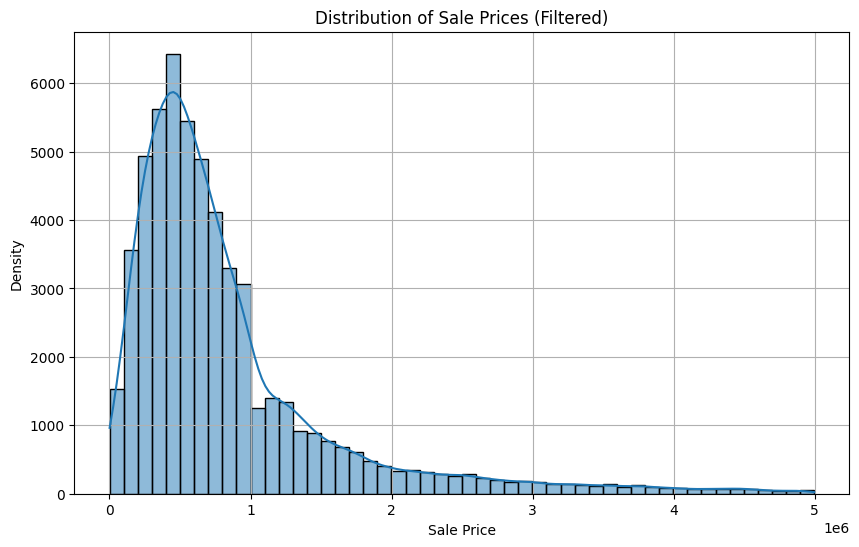

In [22]:
#Remove duplicates
data = data.drop_duplicates()

#Plot the distribution of sale prices
plt.figure(figsize=(10, 6))
sns.histplot(data['SALE PRICE'], kde=True, bins=50)
plt.title('Distribution of Sale Prices (Filtered)')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In real estate data, the GROSS SQUARE FEET (total building area) should logically be equal to or larger than the LAND SQUARE FEET (land area). If this condition is violated, it's likely due to data entry errors, so removing such rows ensures data integrity. Additionally, large residential and commercial properties with extreme values can distort the analysis

In [23]:
#Remove rows where land_square_feet is greater than gross_square_feet
data = data[data['LAND SQUARE FEET'] < data['GROSS SQUARE FEET']]

#Limit metrics to remove extreme outliers
data = data[(data['RESIDENTIAL UNITS'] < 500) &
            (data['COMMERCIAL UNITS'] < 500) &
            (data['GROSS SQUARE FEET'] < 2530) &
            (data['GROSS SQUARE FEET'] > 120)]

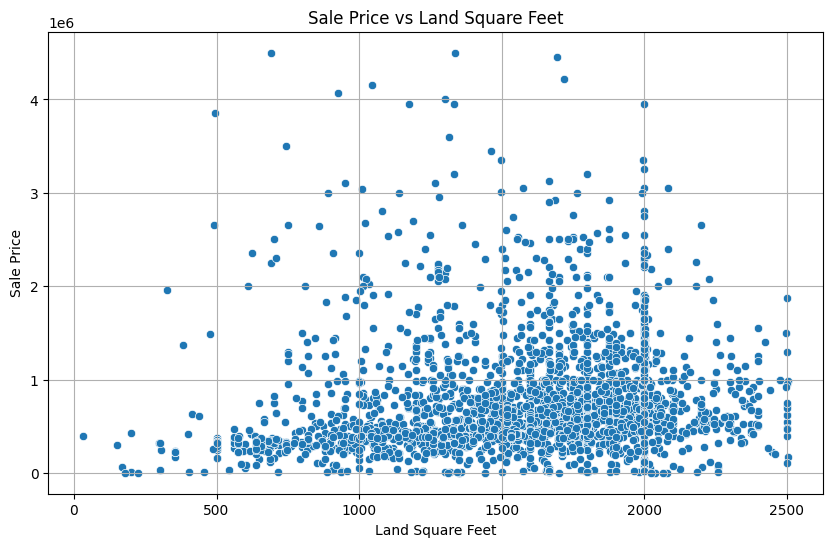

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LAND SQUARE FEET', y='SALE PRICE', data=data)
plt.title('Sale Price vs Land Square Feet')
plt.xlabel('Land Square Feet')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

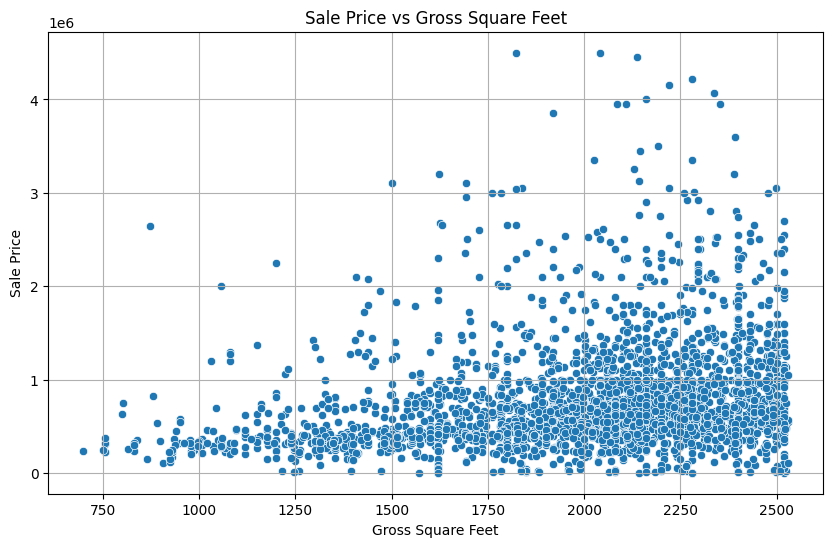

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data)
plt.title('Sale Price vs Gross Square Feet')
plt.xlabel('Gross Square Feet')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

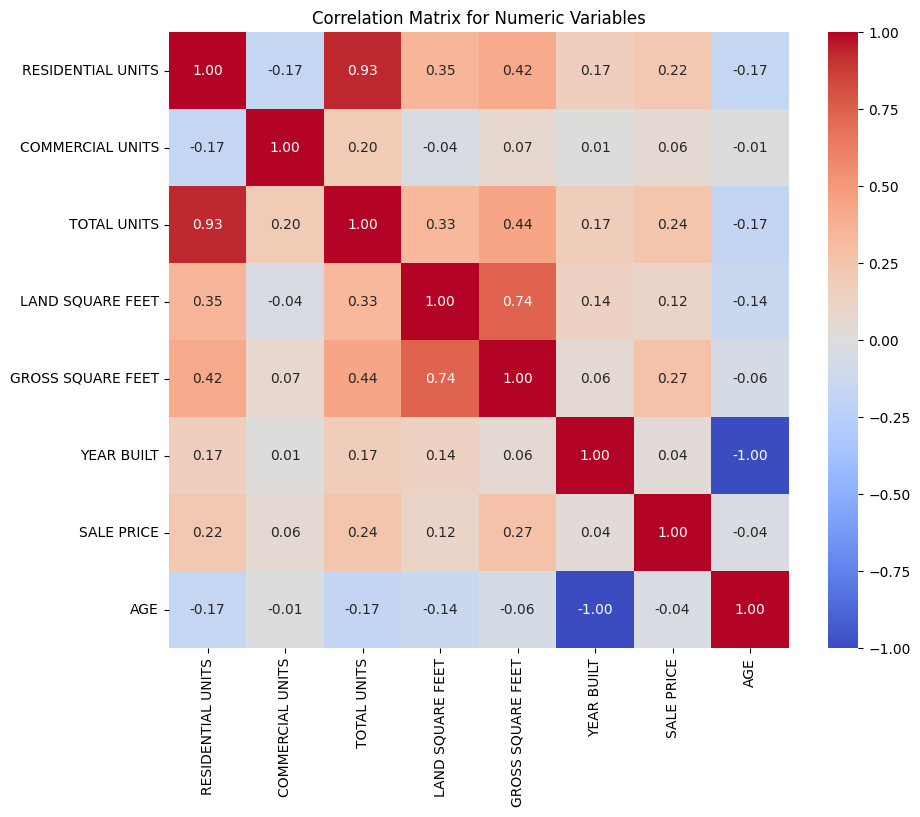

In [26]:
numeric_columns = ['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 
                   'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 
                   'SALE PRICE', 'AGE']

correlation_matrix = data[numeric_columns].corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numeric Variables')
plt.show()

# Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
X = data[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 
          'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'AGE']]

y = data['SALE PRICE']

In [29]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = LinearRegression()

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 276548069485.0086
R-squared: 0.0725344194522003


In [31]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                    Coefficient
RESIDENTIAL UNITS  42762.029148
COMMERCIAL UNITS   28254.113217
TOTAL UNITS        71016.142365
LAND SQUARE FEET    -258.822011
GROSS SQUARE FEET    510.423668
YEAR BUILT             8.618935
AGE                   -8.618935


In [32]:
#Log Transform

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_log = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_log)
r2 = r2_score(y_test, y_pred_log)

print(f'Mean Squared Error (Log Transformed): {mse}')
print(f'R-squared (Log Transformed): {r2}')


Mean Squared Error (Log Transformed): 5.3749385536610796e+20
R-squared (Log Transformed): -8.069612067988106e+20


In [33]:
from sklearn.linear_model import Ridge

#Ridge regression model

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression - Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression - R-squared: {r2_ridge}')

Ridge Regression - Mean Squared Error: 0.541754459961428
Ridge Regression - R-squared: 0.18664217565550567


In [34]:
from sklearn.ensemble import RandomForestRegressor

#random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R-squared: {r2_rf}')

Random Forest - Mean Squared Error: 0.4663885704884013
Random Forest - R-squared: 0.29979202567415253


In [35]:
from sklearn.ensemble import GradientBoostingRegressor

#gradient boosting regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting - Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting - R-squared: {r2_gb}')

Gradient Boosting - Mean Squared Error: 0.4529102542119155
Gradient Boosting - R-squared: 0.32002756559614975


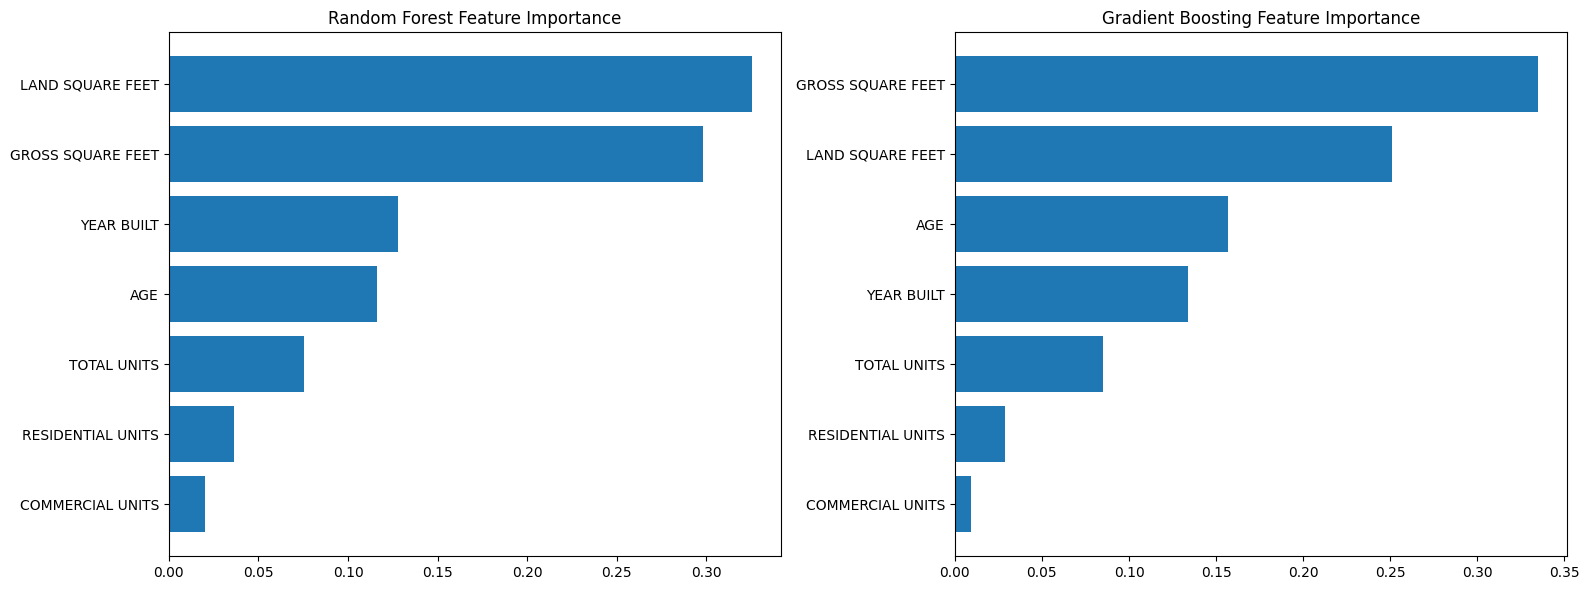

In [36]:
#features for Random Forest
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

# Create a DataFrame 
feature_names = X.columns
rf_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
gb_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': gb_importances})

# Sorting
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)
gb_feature_importance = gb_feature_importance.sort_values(by='Importance', ascending=False)

# Set up the subplots - 1 row, 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot Random Forest
axes[0].barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'])
axes[0].set_title('Random Forest Feature Importance')
axes[0].invert_yaxis()  # Invert y-axis for better readability

# Plot Gradient Boosting
axes[1].barh(gb_feature_importance['Feature'], gb_feature_importance['Importance'])
axes[1].set_title('Gradient Boosting Feature Importance')
axes[1].invert_yaxis()

# Display
plt.tight_layout()
plt.show()

Both the Random Forest and Gradient Boosting models show that land square footage and gross square footage are the most important factors in predicting sale price, with Gradient Boosting slightly outperforming Random Forest in accuracy. While the models explain around 30-32% of the variance in sale price, much of the variation remains unexplained, suggesting that additional features or more advanced modeling techniques could further improve predictions. Both models perform similarly in identifying the key drivers of sale price, emphasizing property size, while other factors like building age and unit count have a smaller but still notable influence. 